<a href="https://colab.research.google.com/github/ArhanWR/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum
**Kelompok 9**

**Nama Anggota :**

1. Abdullah Khafabi / 2041720050

7. Alfan Farchi Al-Hadi / 2141720084

**10. Arhan Windu Rizki Putra Budianto / 2141720227**

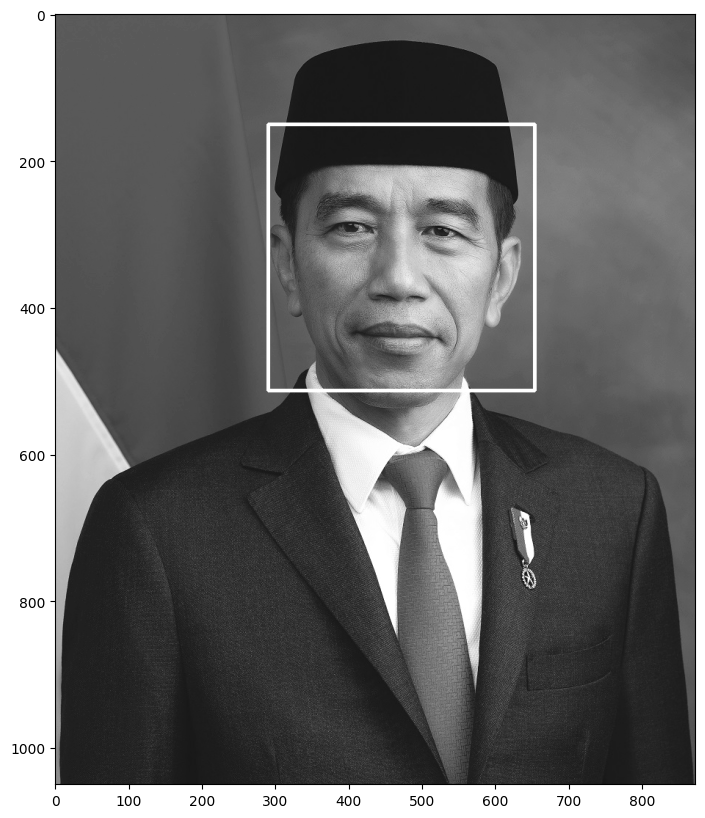

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalface_alt.xml')
jokowi = cv.imread('/content/drive/MyDrive/PCVK/Face Detection/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

# Tugas Praktikum

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).

Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection
dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah
bermasker, atau wajah yang berukuran kecil (solvay).

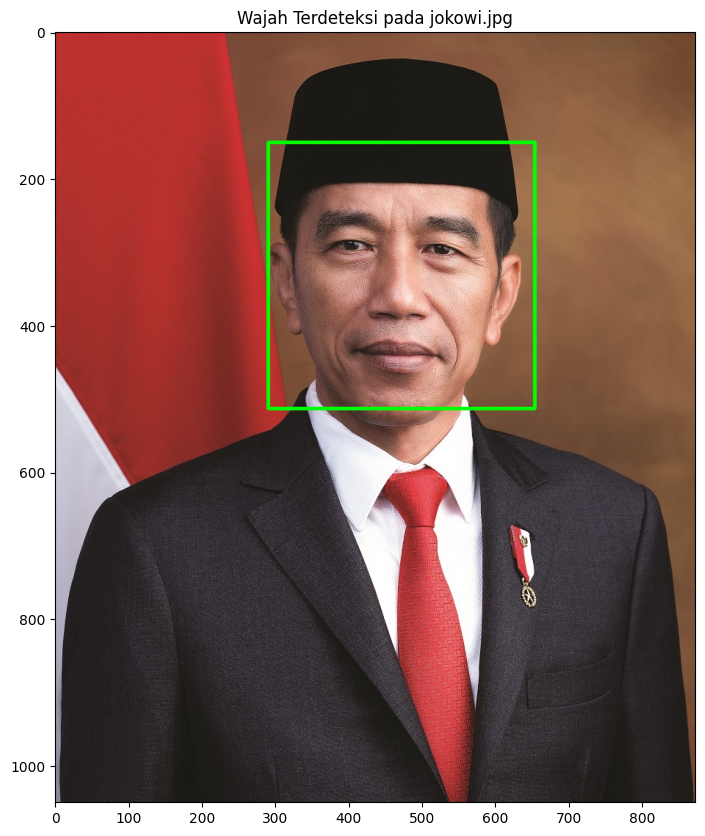

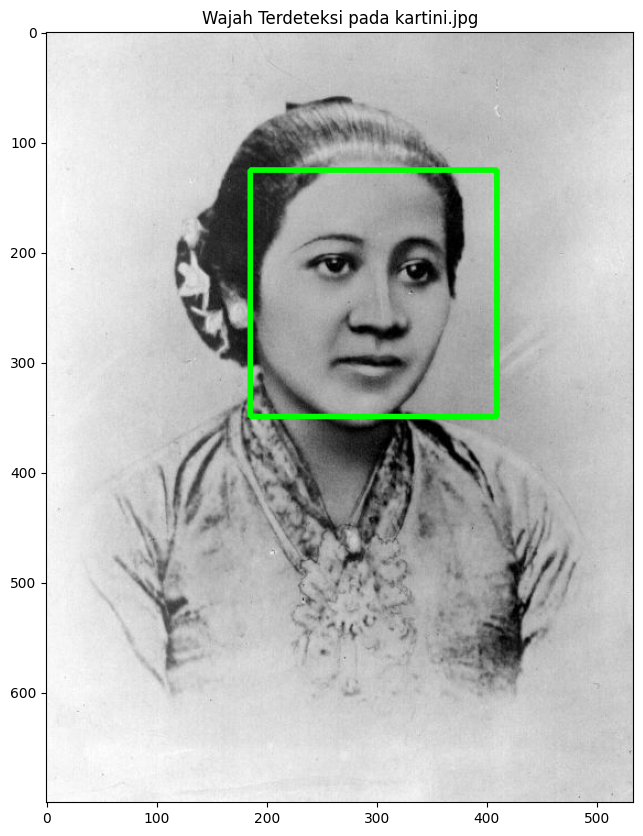

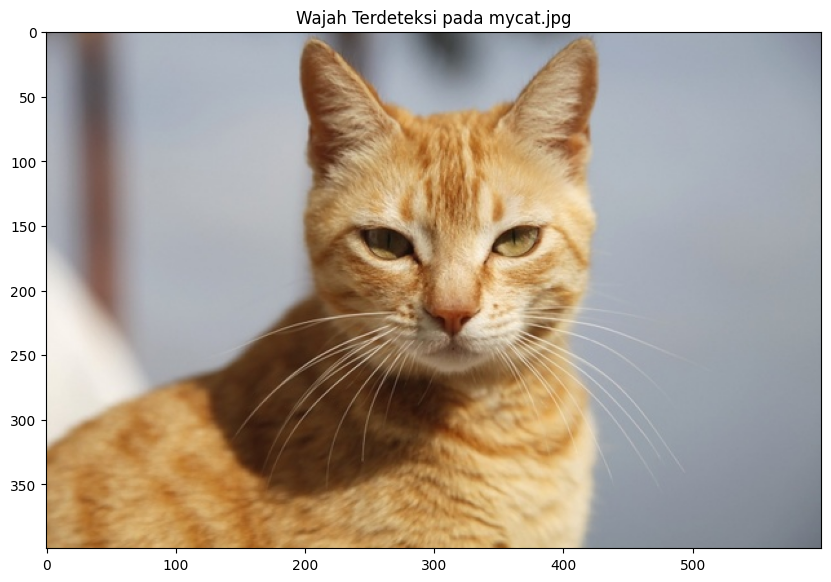

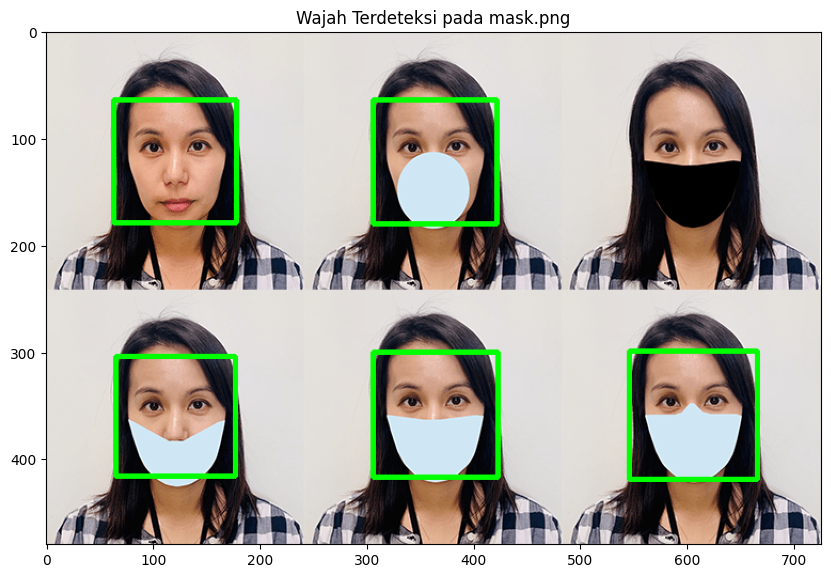

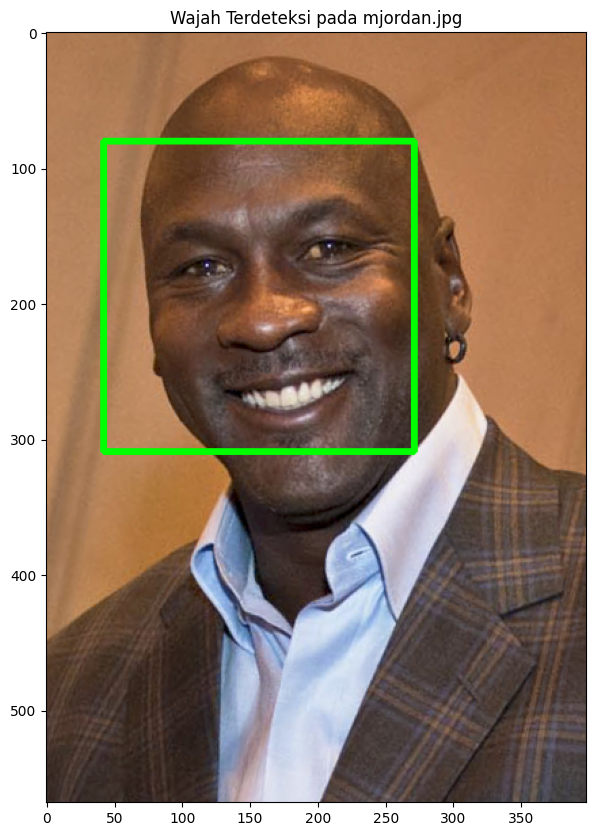

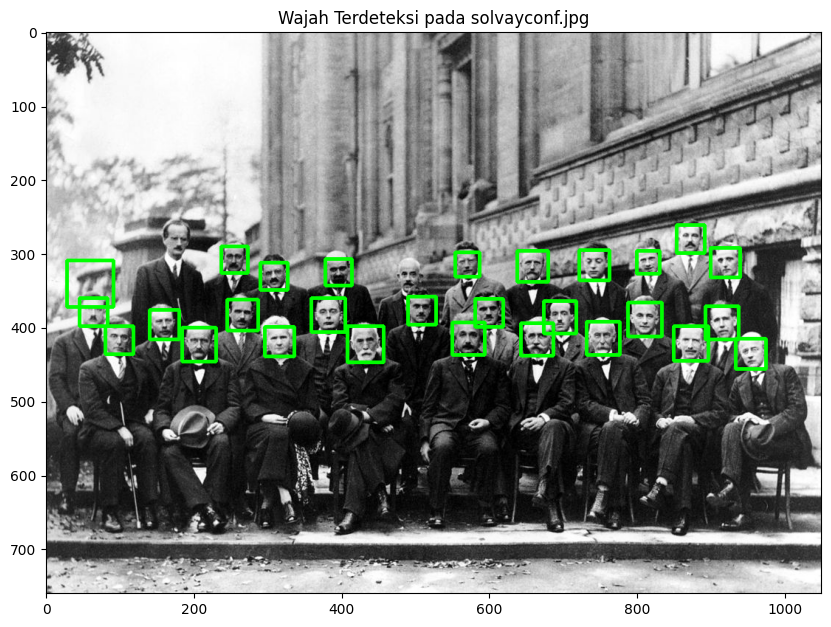

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Path ke direktori gambar
gambar_dir = '/content/drive/MyDrive/PCVK/Face Detection'

# Path ke cascades
cascade_path = '/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalface_alt.xml'

# Membaca cascade
cascade_wajah = cv.CascadeClassifier(cascade_path)

# Daftar gambar yang akan dideteksi wajahnya
gambar_files = [
    'jokowi.jpg',
    'kartini.jpg',
    'mycat.jpg',
    'mask.png',
    'mjordan.jpg',
    'solvayconf.jpg'
]

# Direktori tempat gambar disimpan
gambar_dir = '/content/drive/MyDrive/PCVK/Face Detection'

# Looping untuk setiap gambar di direktori
for gambar_file in gambar_files:
    # Baca gambar
    gambar_path = os.path.join(gambar_dir, gambar_file)
    img = cv.imread(gambar_path)

    # Konversi gambar ke grayscale
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Deteksi wajah
    roi_wajah = cascade_wajah.detectMultiScale(img_gray)

    # Gambar kotak di sekitar wajah pada gambar berwarna
    for (x, y, w, h) in roi_wajah:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Menampilkan gambar dengan kotak wajah
    plt.figure(figsize=(10, 10))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # Menampilkan gambar berwarna
    plt.title(f'Wajah Terdeteksi pada {gambar_file}')
    plt.show()

2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

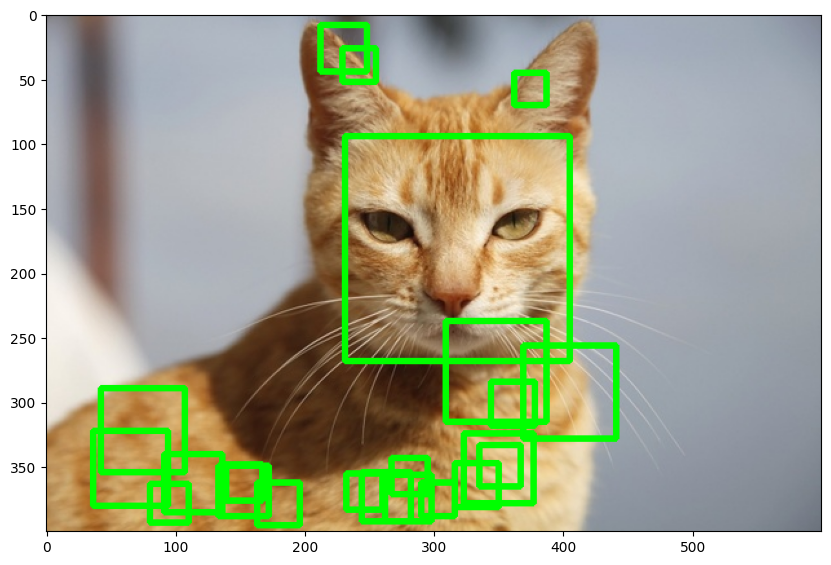

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalcatface.xml')
cat = cv.imread('/content/drive/MyDrive/PCVK/Face Detection/mycat.jpg')

roi_wajah = cascade_wajah.detectMultiScale(cat)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(cat,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))
plt.imshow(cv.cvtColor(cat, cv.COLOR_BGR2RGB))

4. Cobakan juga untuk eyes detection.

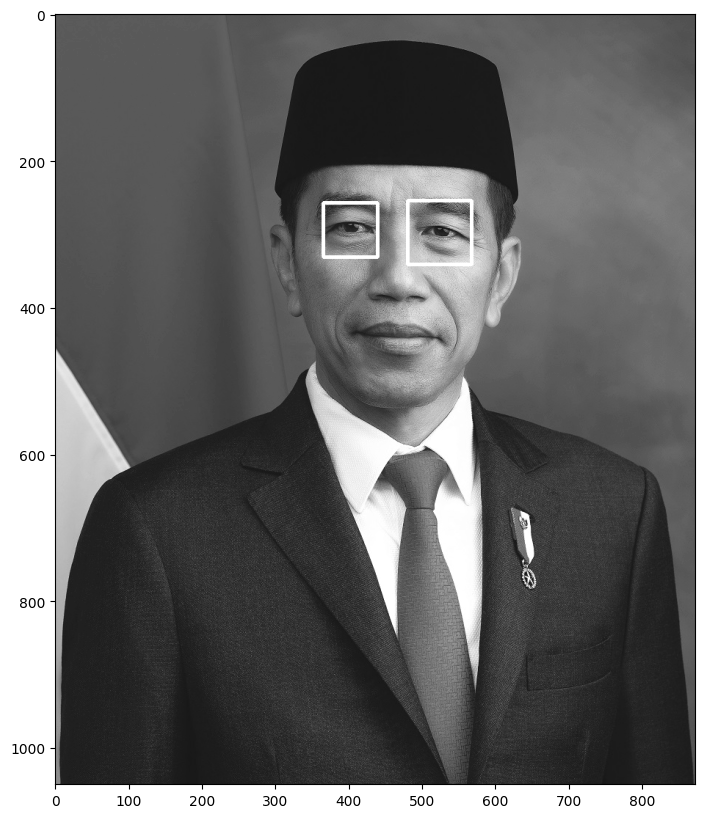

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_eye.xml')
jokowi = cv.imread('/content/drive/MyDrive/PCVK/Face Detection/jokowi.jpg',0)

roi_mata = cascade_mata.detectMultiScale(jokowi)
for(x,y,w,h) in roi_mata:
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [22]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [23]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [24]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

**Webcam Image**

In [25]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


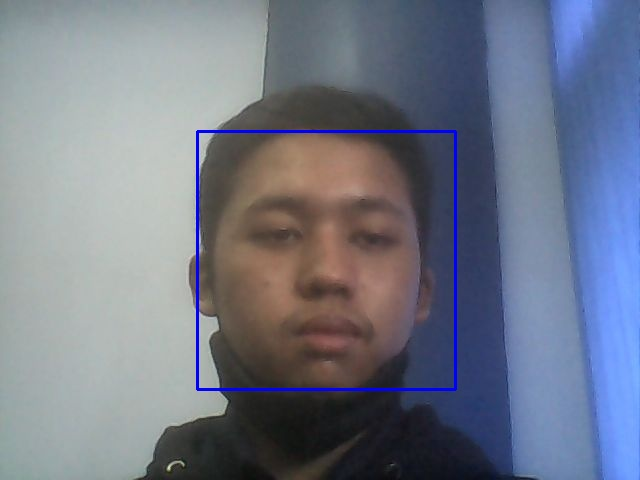

In [26]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Webcam Video**

In [27]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [28]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

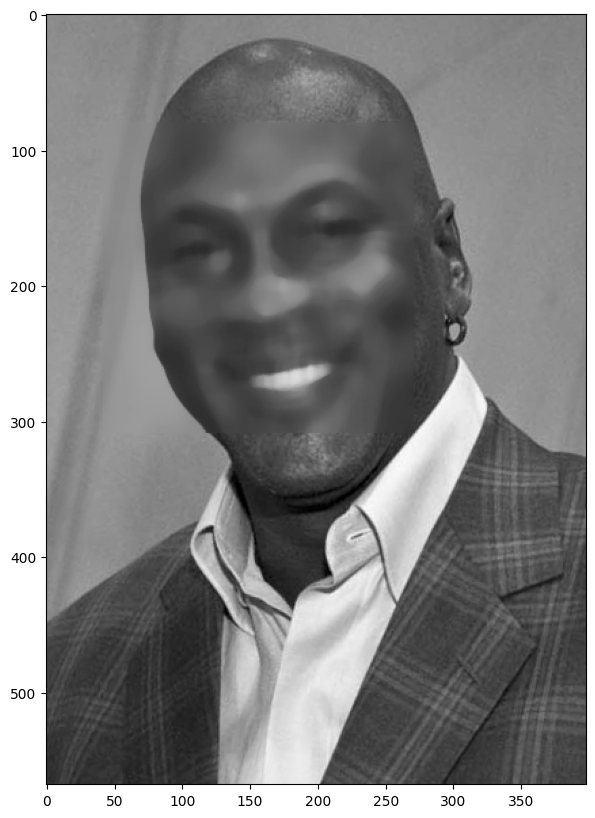

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Path ke cascades
cascade_path = '/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalface_alt.xml'

# Membaca cascade
cascade_wajah = cv.CascadeClassifier(cascade_path)

# Baca gambar dan konversi ke grayscale
gambar_path = '/content/drive/MyDrive/PCVK/Face Detection/mjordan.jpg'
img = cv.imread(gambar_path, cv.IMREAD_GRAYSCALE)

# Deteksi wajah
roi_wajah = cascade_wajah.detectMultiScale(img)

# Looping untuk setiap wajah yang terdeteksi
for (x, y, w, h) in roi_wajah:
    # Ambil region-of-interest (ROI) dari gambar
    roi = img[y:y+h, x:x+w]

    # Lakukan blurring pada ROI menggunakan medianBlur
    roi_blur = cv.medianBlur(roi, 15)

    # Ganti bagian wajah pada gambar dengan yang telah di-blur
    img[y:y+h, x:x+w] = roi_blur

# Menampilkan gambar dengan wajah yang di-blur
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.show()

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

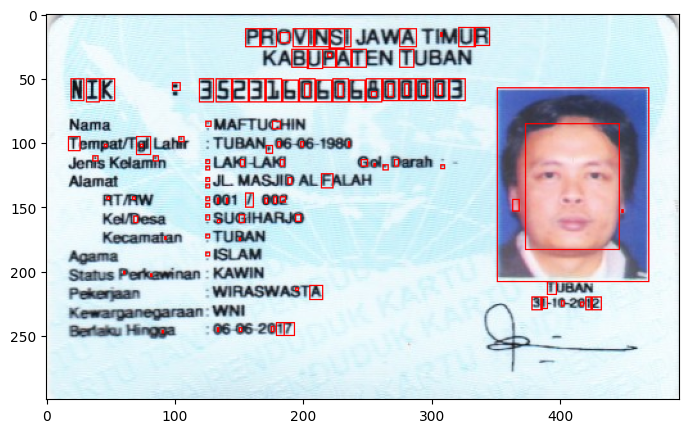

In [30]:
import cv2 as cv
import matplotlib.pyplot as plt

# load data
img = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp3.png')


blurred = cv.GaussianBlur(img, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

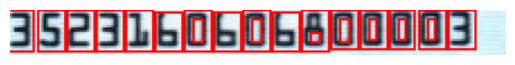

In [31]:
# Koordinat cropping
crop_y_start = 50
crop_y_end = 70
crop_x_start = 120
crop_x_end = 340

# Melakukan cropping pada gambar
cropped_image = img[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

# Menampilkan gambar hasil cropping
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [34]:
import os
import tqdm
import cv2
import random
import numpy as np
import pickle
# Direktori data training
DATADIR = "/content/drive/MyDrive/PCVK/dataset"
dirs = []
training_data = []
width, height = 100, 100
# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
  dirs.append(char_name)
# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
  path = os.path.join(DATADIR, char_name)
  class_number = dirs.index(char_name)
  for img in tqdm(os.listdir(path)):
    try:
      img_array = cv2.imread(os.path.join(data_dir_testing, car,
      char_image), cv2.IMREAD_ANYCOLOR)
      new_array = cv2.resize(img_array, (width, height))
      training_data.append([new_array, class_number])
    except Exception as e:
      pass
random.shuffle(training_data)
X = []
Y = []
for feature, label in training_data:
  X.append(feature)
  Y.append(label)
X = np.array(X).reshape(-1, width, height, 1)
# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

Penjelasan kode di atas adalah sebagai berikut ini  
*   Import terlebih dahulu beberapa yang paket-paket yang dibutuhkan, ada beberapa paket yang baru misalkan tqdm digunakan untuk meload data diikuti dengan
progress bar, numpy merupakan sebuah paket yang digunakan untuk melakukan
operasi-operasi matriks atau array serta pickle adalah depedensi untuk menyimpan
file untuk model data training.
*   Looping data training yang kelak digunakan untuk melabeli hasil pengenalan.
Looping semua file training untuk diubah ke dalam sebuah image array.
*   Variabel X dan variabel Y digunakan untuk menyimpan label dan feature, label
berisi karakter A-Z dan 0-9 sedangkan feture berisi data image array masing-masing
label tersebut.
*    Terakhir tulis isi variabel X dan variabel Y ke dalam sebuah file pickle. File pickle
tersebut nanti akan diload ketika proses training data.

10. Lakukan Training Data

Code berikut digunakan untuk melakukan training data

In [37]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)

adam = Adam(lr=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

ValueError: ignored

Dengan kode di atas kita akan membuat sebuah model, kode di atas menggunakan
deep learning dengan arsitektur CNN(Convolutional Neural Network). Sebenarnya
yang saya ketahui perbedaan mendasar arsitektur ini dengan neural network biasa
adalah masalah feature extraction, feature merupakan sebuah ciri yang khas yang
membedakan antara objek satu dengan objek lainnya. Sebagai contoh karakter A dan
karakter B pada pelat kendaraan tentunya memiliki ciri dengan bentuk yang berbeda.
Feature extraction yang dimiliki CNN(Convolutional Neural Network) sudah disediakan, kita tinggal mengutak-utik arsitekturnya/parameter yang ada di dalamnya.
Sedangkan neural network biasa kita harus mencari sendiri atau dilakukan secara
manual untuk mencari feature tersebut. Di bawah ini adalah bagian kode yang
digunakan untuk membuat atau membangun sebuah feature tersebut.

11. Testing Data

Contoh kode berikut digunakan untuk melakukan testing pengenalan karakter

# Tugas Praktikum
Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!